In [1]:
# Import dependencies

# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
most_recent_date_str = session.query(func.max(Measurement.date)).scalar()
most_recent_date = dt.date.fromisoformat(most_recent_date_str)
most_recent_date

datetime.date(2017, 8, 23)

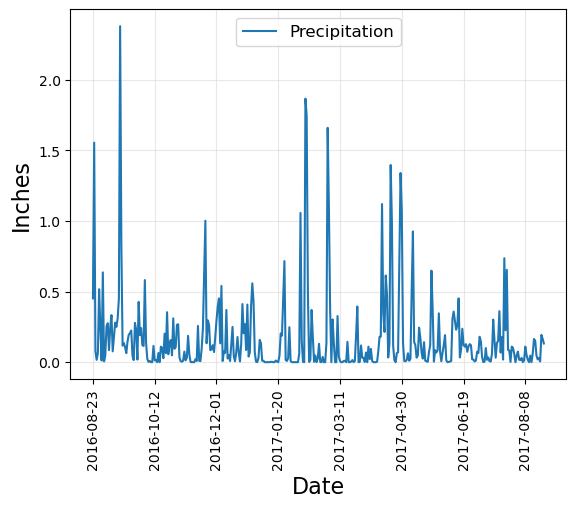

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
begin_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= begin_date)\
    .group_by(Measurement.date)\
    .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=["Date", "Precipitation"])

# Sort the dataframe by date
df = df.sort_values("Date")
# df.head()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x = "Date", y = "Precipitation", rot=90)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Inches", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5)

# legend help from ChatGPT
plt.legend(loc="upper center", fontsize=12)




In [ ]:
df.to_dict(orient="records")

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

# Exploratory Station Analysis

In [10]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = "USC00519281"
results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
                 .filter(Measurement.station == most_active) \
                 .all()
results

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs) \
                 .filter(Measurement.station == most_active) \
                 .filter(Measurement.date >= last_date) \
                 .all()
temperatures = [result[0] for result in results]
plt.hist(temperatures)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.grid(color="lightgrey", alpha=0.5)
plt.legend(["tobs"], loc="upper right", fontsize=12)
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()